# Time Resampling, Shifting, Rolling and Expanding

In this notebook we shall discuss about:

- Time resampling 
- Time Shifting
- Time rolling
- TIme Expanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the data

In [6]:
data = pd.read_csv("./starbucks.csv", index_col='Date', parse_dates = True)

In [12]:
data.head(20)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
2015-01-09,37.2361,27556706
2015-01-12,37.4415,10021486
2015-01-13,37.7401,11040702
2015-01-14,37.5301,9295084


*Close*: Closing stock price (last traded stock price) of Starbuck for each day 

*Volume*: Number of coffees sold in that particular day

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


<AxesSubplot:title={'center':'Closing Stock Price of Starbucks'}, xlabel='Date'>

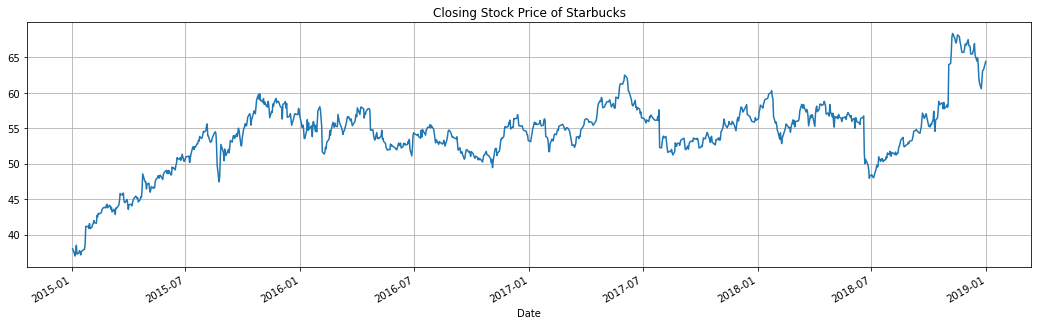

In [10]:
data['Close'].plot(figsize=(18,5), grid=True, title='Closing Stock Price of Starbucks')

In [11]:
data.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


## Time Resampling

We shall be using DataFrame.resample() method in pandas.

It takes **rule** parameter and then need to call an aggregate function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly etc.)

It is passed using offset alias. Reference of the same can be found in the [link](https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases)

In [14]:
data.resample(rule='A').mean()  # Annual (Year-end) resampling with mean aggregation

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [15]:
data.resample(rule='M').mean()  # Month end resampling with mean aggregation

,Close,Volume
Date,,
2015-01-31,38.729470,1.336800e+07
2015-02-28,42.862432,7.908719e+06
2015-03-31,44.321836,8.905969e+06
2015-04-30,45.508914,8.540996e+06
2015-05-31,47.488650,6.723716e+06
2015-06-30,49.761627,6.856079e+06
2015-07-31,52.437959,8.087759e+06
2015-08-31,52.797976,1.064881e+07
2015-09-30,53.006186,8.935548e+06


In [16]:
data.resample(rule='MS').mean()  # Month start resampling with mean aggregation

,Close,Volume
Date,,
2015-01-01,38.729470,1.336800e+07
2015-02-01,42.862432,7.908719e+06
2015-03-01,44.321836,8.905969e+06
2015-04-01,45.508914,8.540996e+06
2015-05-01,47.488650,6.723716e+06
2015-06-01,49.761627,6.856079e+06
2015-07-01,52.437959,8.087759e+06
2015-08-01,52.797976,1.064881e+07
2015-09-01,53.006186,8.935548e+06


In [17]:
data.resample(rule='Q').mean()

,Close,Volume
Date,,
2015-03-31,42.033705,1.005831e+07
2015-06-30,47.622476,7.375698e+06
2015-09-30,52.742539,9.206285e+06
2015-12-31,57.498228,8.002620e+06
2016-03-31,55.171702,1.093832e+07
2016-06-30,54.050434,8.582716e+06
2016-09-30,53.350578,8.996589e+06
2016-12-31,53.040917,8.753118e+06
2017-03-31,54.447013,9.846263e+06


<AxesSubplot:xlabel='Date'>

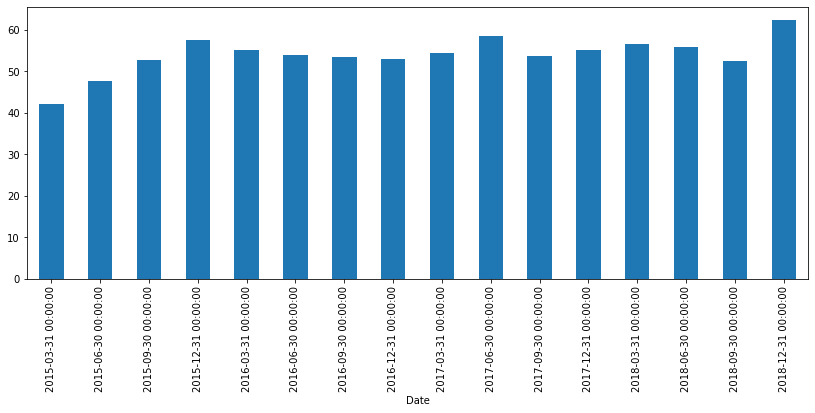

In [20]:
data['Close'].resample(rule='Q').mean().plot.bar(figsize=(14,5))

<AxesSubplot:xlabel='Date'>

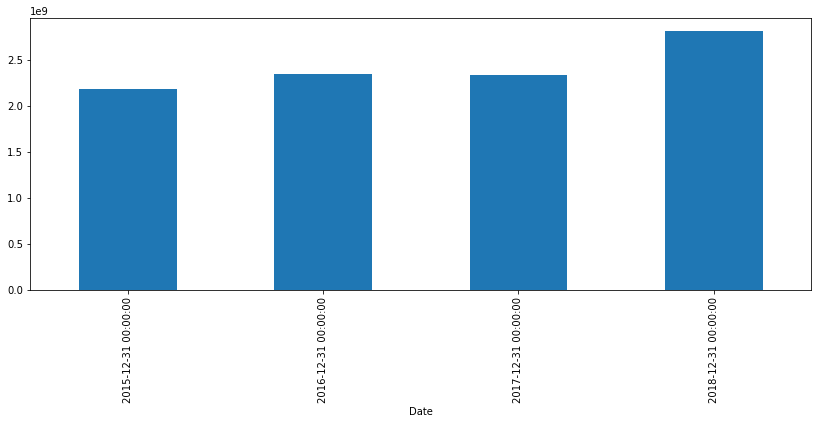

In [21]:
data['Volume'].resample(rule='A').sum().plot.bar(figsize=(14,5))

## Time Shifting

In [24]:
data['Close']

,Close
Date,
2015-01-02,38.0061
2015-01-05,37.2781
2015-01-06,36.9748
2015-01-07,37.8848
2015-01-08,38.4961
...,...
2018-12-24,60.5600
2018-12-26,63.0800
2018-12-27,63.2000


### Shifting down by 1 unit

In [27]:
data['Close: 1 day delay'] = data['Close'].shift(1)

In [28]:
data.head(10)

,Close,Volume,Close: 1 day delay
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,38.0061
2015-01-06,36.9748,7664340,37.2781
2015-01-07,37.8848,9732554,36.9748
2015-01-08,38.4961,13170548,37.8848
2015-01-09,37.2361,27556706,38.4961
2015-01-12,37.4415,10021486,37.2361
2015-01-13,37.7401,11040702,37.4415
2015-01-14,37.5301,9295084,37.7401


In [29]:
data.tail()

,Close,Volume,Close: 1 day delay
Date,,,
2018-12-24,60.56,6323252,61.39
2018-12-26,63.08,16646238,60.56
2018-12-27,63.20,11308081,63.08
2018-12-28,63.39,7712127,63.20
2018-12-31,64.40,7690183,63.39


In [30]:
data['Change in Close'] = data['Close'] - data['Close: 1 day delay']

In [31]:
data.head(10)

,Close,Volume,Close: 1 day delay,Change in Close
Date,,,,
2015-01-02,38.0061,6906098,NaN,NaN
2015-01-05,37.2781,11623796,38.0061,-0.7280
2015-01-06,36.9748,7664340,37.2781,-0.3033
2015-01-07,37.8848,9732554,36.9748,0.9100
2015-01-08,38.4961,13170548,37.8848,0.6113
2015-01-09,37.2361,27556706,38.4961,-1.2600
2015-01-12,37.4415,10021486,37.2361,0.2054
2015-01-13,37.7401,11040702,37.4415,0.2986
2015-01-14,37.5301,9295084,37.7401,-0.2100


<AxesSubplot:title={'center':'Change in Closing stock price per day'}, xlabel='Date'>

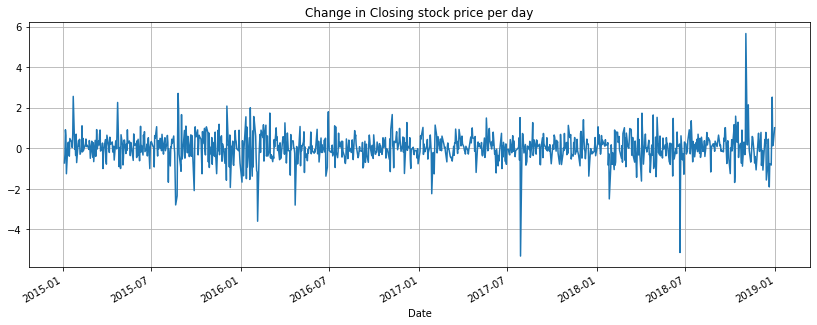

In [33]:
data['Change in Close'].plot(figsize = (14,5), title="Change in Closing stock price per day", grid=True)

<AxesSubplot:>

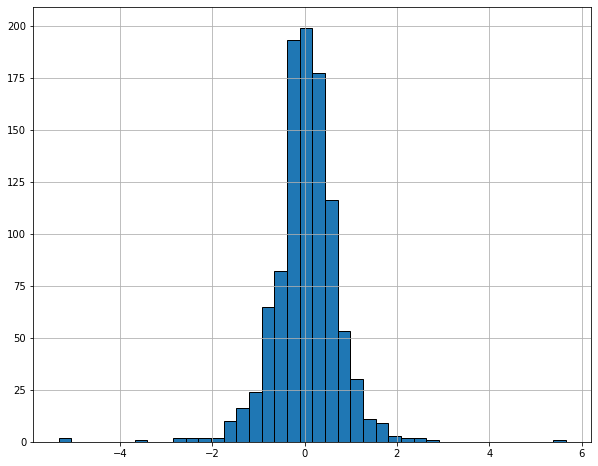

In [38]:
data['Change in Close'].hist(bins=40, figsize=(10,8), edgecolor='k')

### Shifting down by k units

In [39]:
k = 7

data['Close: k days delay'] = data['Close'].shift(periods=k)

In [40]:
data.head(20)

,Close,Volume,Close: 1 day delay,Change in Close,Close: k days delay
Date,,,,,
2015-01-02,38.0061,6906098,NaN,NaN,NaN
2015-01-05,37.2781,11623796,38.0061,-0.7280,NaN
2015-01-06,36.9748,7664340,37.2781,-0.3033,NaN
2015-01-07,37.8848,9732554,36.9748,0.9100,NaN
2015-01-08,38.4961,13170548,37.8848,0.6113,NaN
2015-01-09,37.2361,27556706,38.4961,-1.2600,NaN
2015-01-12,37.4415,10021486,37.2361,0.2054,NaN
2015-01-13,37.7401,11040702,37.4415,0.2986,38.0061
2015-01-14,37.5301,9295084,37.7401,-0.2100,37.2781


<AxesSubplot:xlabel='Date'>

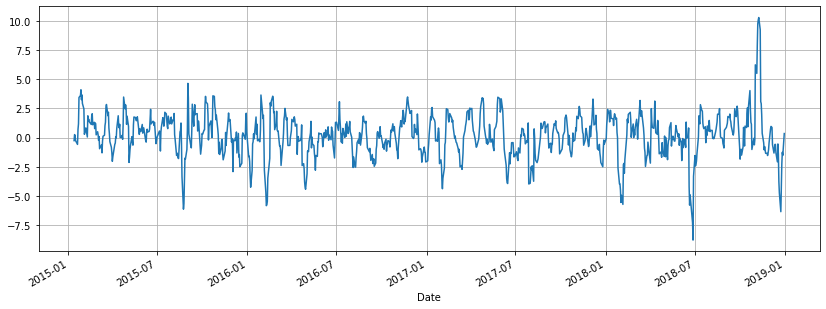

In [42]:
(data['Close'] - data['Close: k days delay']).plot(figsize=(14,5), grid=True)

<AxesSubplot:>

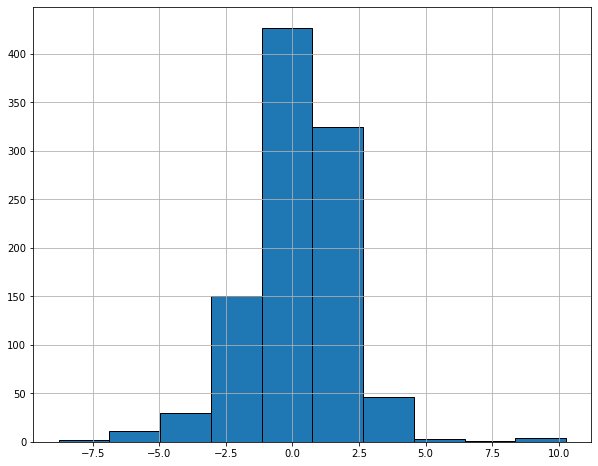

In [43]:
(data['Close'] - data['Close: k days delay']).hist(bins=10, figsize=(10,8), edgecolor='k')

### Shifting up by 1 unit

Shifting up by 1 unit is putting the perod = -1

In [45]:
data['Close: 1 day lead'] = data['Close'].shift(-1)

In [46]:
data[['Close', 'Close: 1 day lead']].head(10)

,Close,Close: 1 day lead
Date,,
2015-01-02,38.0061,37.2781
2015-01-05,37.2781,36.9748
2015-01-06,36.9748,37.8848
2015-01-07,37.8848,38.4961
2015-01-08,38.4961,37.2361
2015-01-09,37.2361,37.4415
2015-01-12,37.4415,37.7401
2015-01-13,37.7401,37.5301
2015-01-14,37.5301,37.1381


In [47]:
data[['Close', 'Close: 1 day lead']].tail(10)

,Close,Close: 1 day lead
Date,,
2018-12-17,64.47,64.92
2018-12-18,64.92,64.06
2018-12-19,64.06,62.15
2018-12-20,62.15,61.39
2018-12-21,61.39,60.56
2018-12-24,60.56,63.08
2018-12-26,63.08,63.20
2018-12-27,63.20,63.39
2018-12-28,63.39,64.40


### Shifting up by k units

In [48]:
k = 7

data['Close: k days lead'] = data['Close'].shift(periods=(-1)*k)

In [49]:
data[['Close', 'Close: k days lead']].head(20)

,Close,Close: k days lead
Date,,
2015-01-02,38.0061,37.7401
2015-01-05,37.2781,37.5301
2015-01-06,36.9748,37.1381
2015-01-07,37.8848,37.6188
2015-01-08,38.4961,37.9058
2015-01-09,37.2361,37.9361
2015-01-12,37.4415,38.6128
2015-01-13,37.7401,41.1702
2015-01-14,37.5301,41.1235


In [50]:
data[['Close', 'Close: k days lead']].tail(20)

,Close,Close: k days lead
Date,,
2018-11-30,66.72,66.13
2018-12-03,67.50,66.91
2018-12-04,66.65,65.34
2018-12-06,66.55,64.47
2018-12-07,65.47,64.92
2018-12-10,65.49,64.06
2018-12-11,65.92,62.15
2018-12-12,66.13,61.39
2018-12-13,66.91,60.56


## Time rolling

In [59]:
k = 30

data['Close: rolling avg 7 days'] = data['Close'].rolling(window=7).mean()

data['Close: rolling avg 30 days'] = data['Close'].rolling(window=30).mean()

<IPython.core.display.Javascript object>


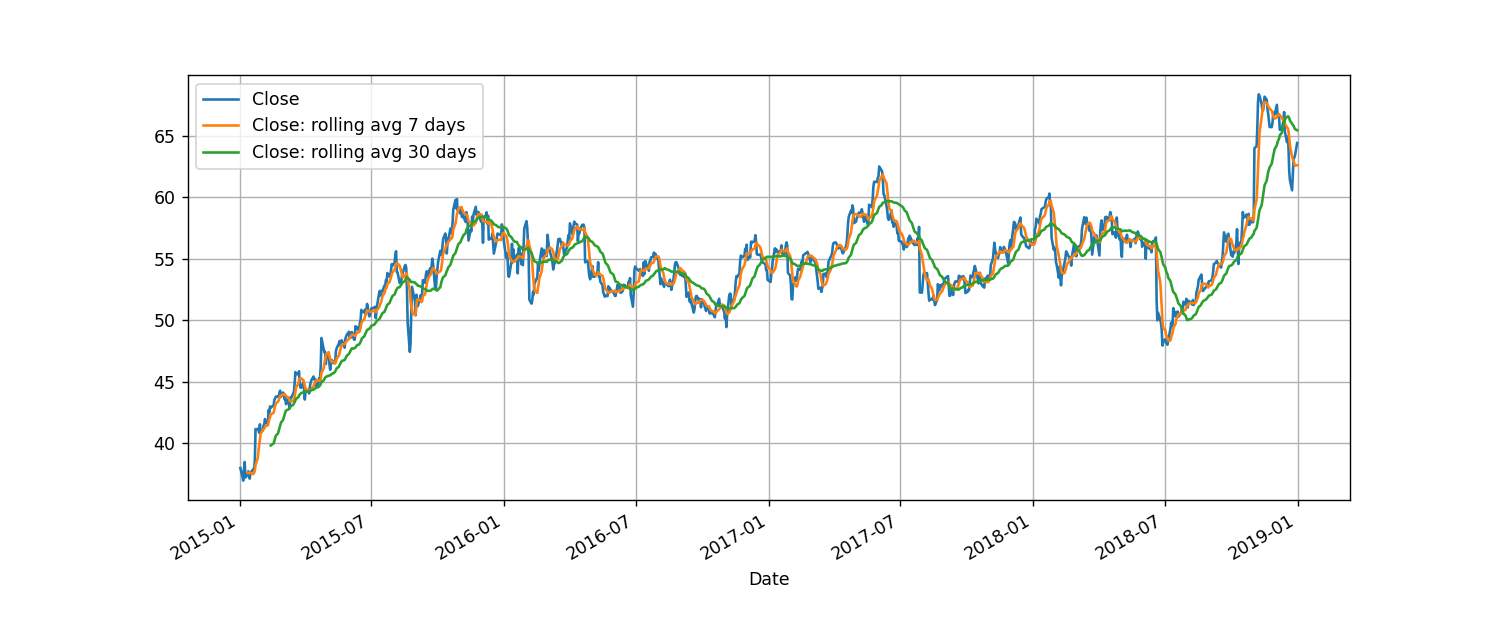

<AxesSubplot:xlabel='Date'>

In [60]:
%matplotlib notebook

data[['Close', 'Close: rolling avg 7 days', 'Close: rolling avg 30 days']].plot(figsize=(12,5), grid= True)

## Time Expanding

In [63]:
data['Close: expanding'] = data['Close'].expanding().mean()

<IPython.core.display.Javascript object>


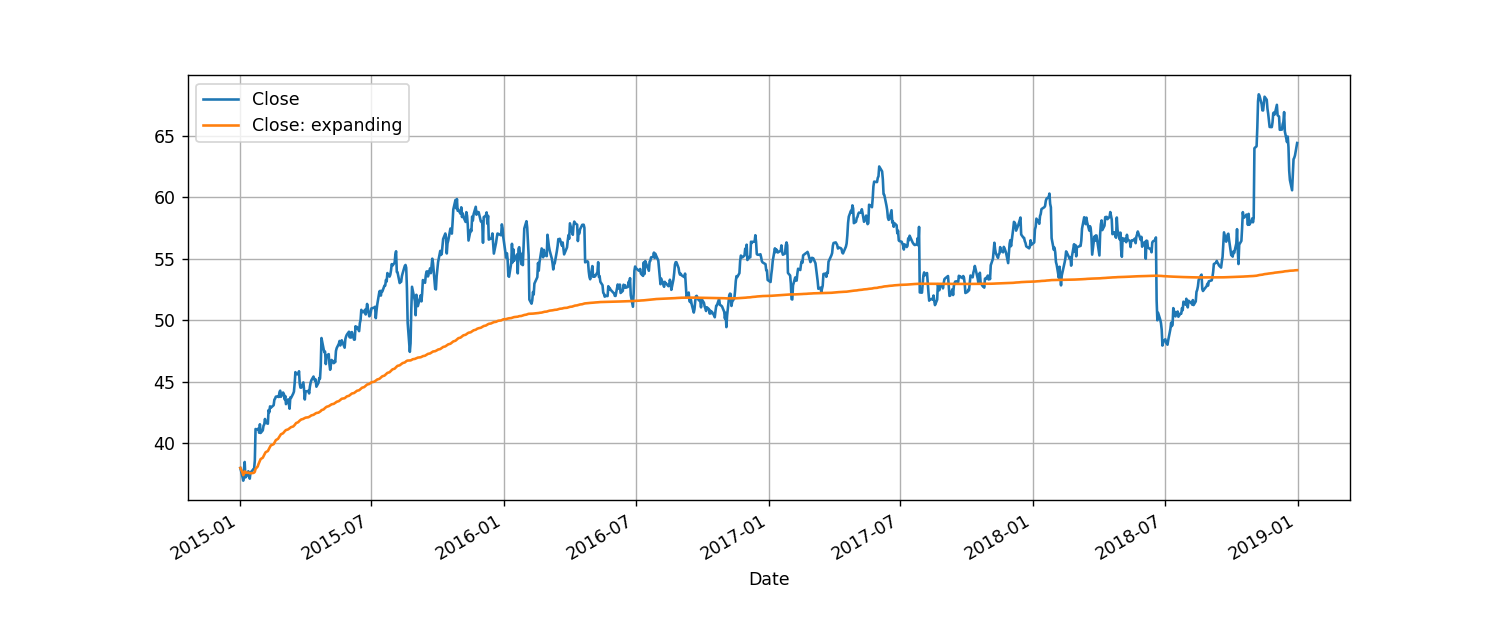

<AxesSubplot:xlabel='Date'>

In [65]:
data[['Close','Close: expanding']].plot(figsize=(12,5), grid = True)

In [66]:
avg = 20
n = 100

total = n * avg

In [68]:
new_total = total + 60

In [69]:
new_avg = new_total / (n+1)

In [70]:
new_avg

20.396039603960396